# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

Veamos la información de las columnas

In [3]:
# resumen de la información

def resumen_por_columna(df,cols):
    pd_series = df[cols]
    
    # elementos distintos 
    l_unique = pd_series.unique()
    
    # elementos vacios
    
    l_vacios = pd_series[pd_series.isna()]
    
    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    
    return df_info

frames = []

for col in df.columns:
    aux_df = resumen_por_columna(df,col)
    frames.append(aux_df)
    
df_info = pd.concat(frames).reset_index(drop=True)
df_info['% vacios'] = df_info['vacios']/len(df)
df_info

,columna,unicos,vacios,% vacios
0,sepalLength,36,1,0.006667
1,sepalWidth,26,1,0.006667
2,petalLength,45,1,0.006667
3,petalWidth,24,1,0.006667
4,species,11,1,0.006667


1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [4]:
a=len(df['species'].unique())
l=df['species'].unique()#da la lista de species
print(f'Originalmente hay {a} especies, la lista es {l}')

Originalmente hay 11 especies, la lista es ['setosa' ' virginica' 'VIRGINICA' 'virginica' 'virginica ' 'versicolor'
 'Versicolor' 'VERSICOLOR' nan 'Setosa' 'SETOSA']


In [5]:
df['species'] = df['species'].str.lower().str.strip()#se cambian todos a minuscula y elimina espacios innecesarios
df['species'] = df['species'].fillna('default')#deja los nan como default
l=df['species'].unique()#da la lista de species
a=len(df['species'].unique())-1
print(f'Hay {a} especies y los default, la lista es {l}')

Hay 3 especies y los default, la lista es ['setosa' 'virginica' 'versicolor' 'default']


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

In [6]:
#se cambian los nan por 0
df['petalLength'] = df['petalLength'].fillna(0)
df['petalWidth'] = df['petalWidth'].fillna(0)
df['sepalLength'] = df['sepalLength'].fillna(0)
df['sepalWidth'] = df['sepalWidth'].fillna(0)

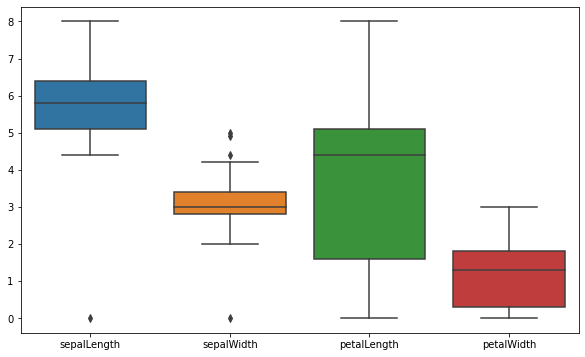

In [7]:
# Pre-format DataFrame
p_df = df.drop(['species'], axis=1)
 
# New boxplot using p_df
plt.figure(figsize=(10, 6))
sns.boxplot(data=p_df)
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [8]:
w = (df['sepalLength']>=4.0) & (df['sepalLength']<=7.0)
x = (df['sepalWidth']>=2.0) & (df['sepalWidth']<=4.5)
y = (df['petalLength']>=1.0) & (df['petalLength']<=7.0)
z = (df['petalWidth']>=0.1) & (df['petalWidth']<=2.5)#Se genera una lista que contiene True si se cumple y False en caso contrario
lista_todo = w & x & y & z
df_2 = df.copy()#Copiamos para no sobre escribir el dataframe original
df_2.insert(5, "label", lista_todo, True)#Se inserta la columna label con lo anterior
df_2

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

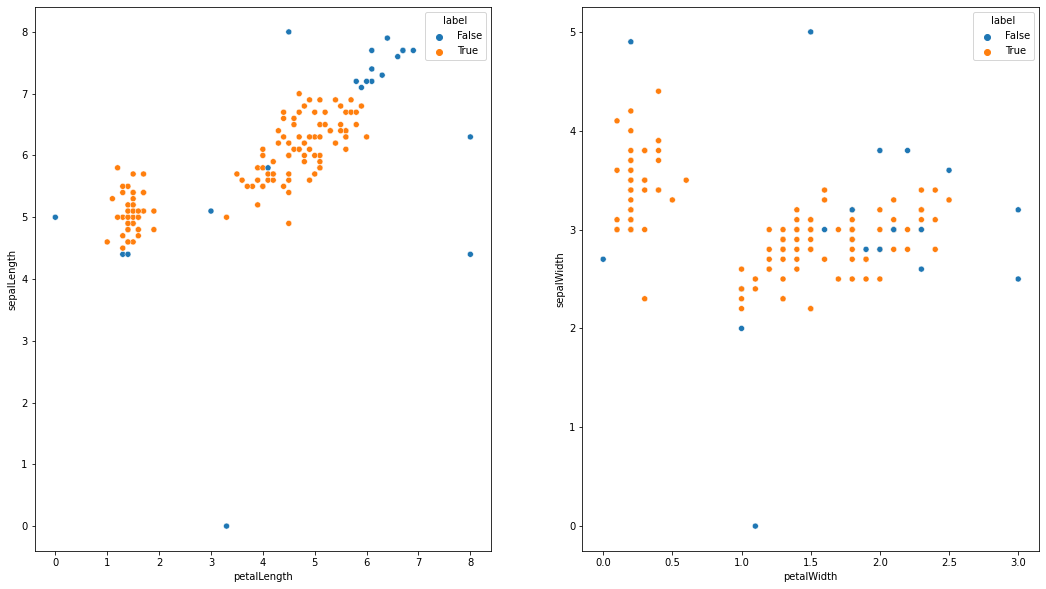

In [9]:
#se entiende del nombre del gráfico que al colocar a vs b, a es el eje y, b es el eje x
#Creación de gráficos con subplot y usando sns
plt.figure(figsize= (18,10))
sns.scatterplot(
    x='petalLength',
    y='sepalLength',
    hue='label',
    data=df_2,
    ax=plt.subplot(1,2,1)#para que sean distintos gráficos
)
sns.scatterplot(
    x='petalWidth',
    y='sepalWidth',
    hue='label',
    data=df_2,
    ax=plt.subplot(1,2,2)#para que sean distintos gráficos
)
plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

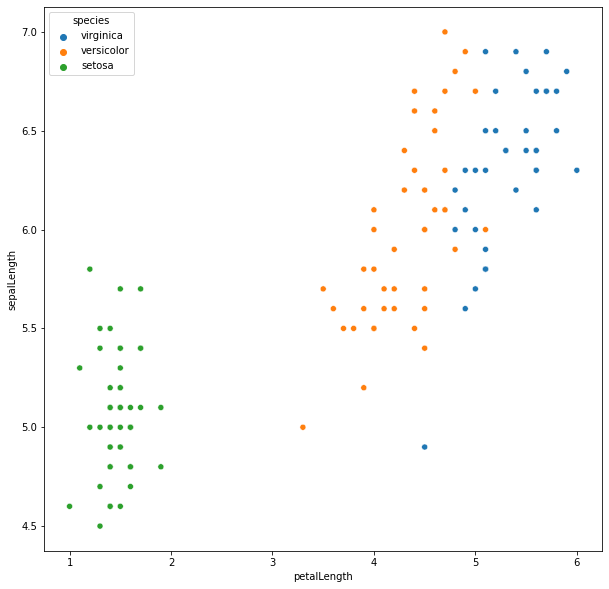

In [10]:
#se entiende del nombre del gráfico que al colocar a vs b, a es el eje y, b es el eje x
plt.figure(figsize=(10, 10))
df_2 = df_2.drop(df_2[df_2.label== False].index)#Eliminamos los False
df_2 = df_2.drop(df_2[df_2.species=='default'].index)#Se elimiman las filas con default
a_graficar = pd.DataFrame(df_2.loc[df_2["label"] == True])#Se filtran los datos que cumplen con ser True en label
sns.scatterplot(
    x='petalLength',
    y='sepalLength',
    hue='species',
    data=a_graficar
)
plt.show()